In [5]:
%cd ~/Desktop/repos/analisi_dati/final-task/
%load_ext autoreload
%autoreload 2

/Users/lucaarnaboldi/Desktop/repos/analisi_dati/final-task
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Input, Dense
import tensorflow.keras as keras
import tensorflow_addons as tfa

from metrics import *

metrics = [
  keras.metrics.CategoricalAccuracy(name='accuracy'),
  tfa.metrics.F1Score(num_classes=len(classes), average='macro')
]

def nn_train(hidden_layers, Xtr, Ytr, epcs):
  print(X_train.shape[1], Xtr.shape[1])
  model = Sequential([Input(shape=X_train.shape[1])] + hidden_layers + [Dense(cY_valid_cat.shape[1], activation='softmax')])
  model.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=metrics
  )
  model.fit(
    Xtr,
    Ytr,
    epochs=epcs,
    validation_data=(
      X_valid,
      cY_valid_cat
    )
  )
  
  return np.argmax(model.predict(X_valid), axis=1)

#### No preprocessing dataset

In [20]:
raw_pY = nn_train([
  Dense(50, activation='relu'),
  Dense(100,activation='relu'),
  Dense(50, activation='relu')
], X_train, cY_train_cat, 29)

46 46
Epoch 1/29
5298/5298 [==============================] - 6s 1ms/step - loss: 1.3068 - accuracy: 0.6079 - f1_score: 0.3364 - val_loss: 1.0703 - val_accuracy: 0.6253 - val_f1_score: 0.2379
Epoch 2/29
5298/5298 [==============================] - 5s 986us/step - loss: 1.0168 - accuracy: 0.6450 - f1_score: 0.2916 - val_loss: 1.0180 - val_accuracy: 0.6553 - val_f1_score: 0.3009
Epoch 3/29
5298/5298 [==============================] - 6s 1ms/step - loss: 0.9405 - accuracy: 0.6723 - f1_score: 0.3719 - val_loss: 0.9506 - val_accuracy: 0.6740 - val_f1_score: 0.4026
Epoch 4/29
5298/5298 [==============================] - 5s 1ms/step - loss: 0.8901 - accuracy: 0.6906 - f1_score: 0.4323 - val_loss: 0.9018 - val_accuracy: 0.6913 - val_f1_score: 0.4337
Epoch 5/29
5298/5298 [==============================] - 6s 1ms/step - loss: 0.8507 - accuracy: 0.7046 - f1_score: 0.4590 - val_loss: 0.8661 - val_accuracy: 0.6945 - val_f1_score: 0.4696
Epoch 6/29
5298/5298 [==============================] - 6s 1ms

(0.7699070669251855, 0.6078503036340402, 0.7392013050185056, 0.6312522579019904)


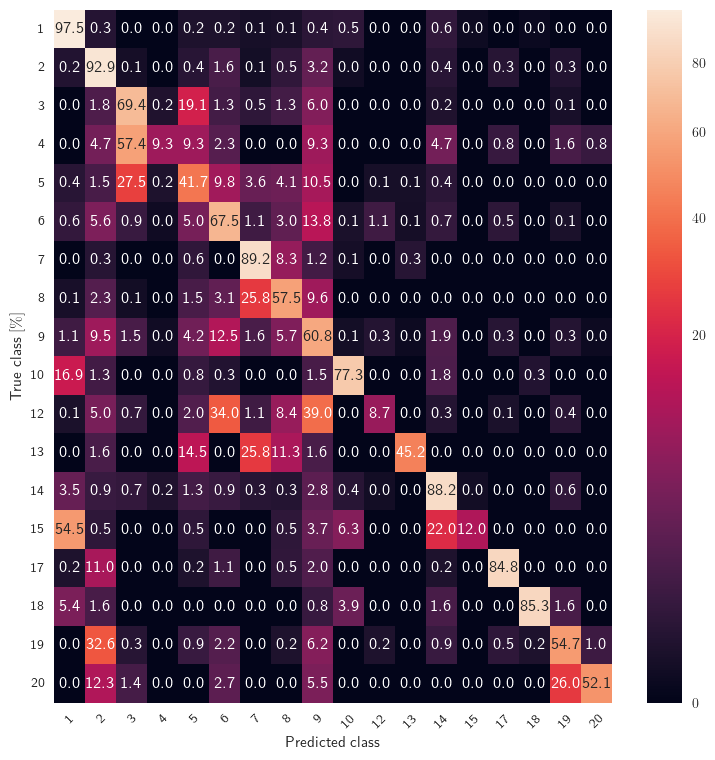

In [12]:
print(evaluate_model(cY_valid, raw_pY))
plot_confusion_matrix(cY_valid, raw_pY, show=True, filename='figures/nn/noperp.pdf')

#### SMOTE dataset

46 46
Epoch 1/50
22805/22805 [==============================] - 23s 992us/step - loss: 1.2043 - accuracy: 0.6031 - f1_score: 0.5945 - val_loss: 1.1201 - val_accuracy: 0.6079 - val_f1_score: 0.4873
Epoch 2/50
22805/22805 [==============================] - 23s 991us/step - loss: 0.8706 - accuracy: 0.6924 - f1_score: 0.6865 - val_loss: 0.9631 - val_accuracy: 0.6465 - val_f1_score: 0.5318
Epoch 3/50
22805/22805 [==============================] - 20s 890us/step - loss: 0.7936 - accuracy: 0.7182 - f1_score: 0.7137 - val_loss: 0.8356 - val_accuracy: 0.6965 - val_f1_score: 0.5821
Epoch 4/50
22805/22805 [==============================] - 20s 878us/step - loss: 0.7504 - accuracy: 0.7329 - f1_score: 0.7293 - val_loss: 0.8968 - val_accuracy: 0.6626 - val_f1_score: 0.5471
Epoch 5/50
22805/22805 [==============================] - 20s 884us/step - loss: 0.7186 - accuracy: 0.7451 - f1_score: 0.7420 - val_loss: 0.8770 - val_accuracy: 0.6804 - val_f1_score: 0.5654
Epoch 6/50
22805/22805 [===============

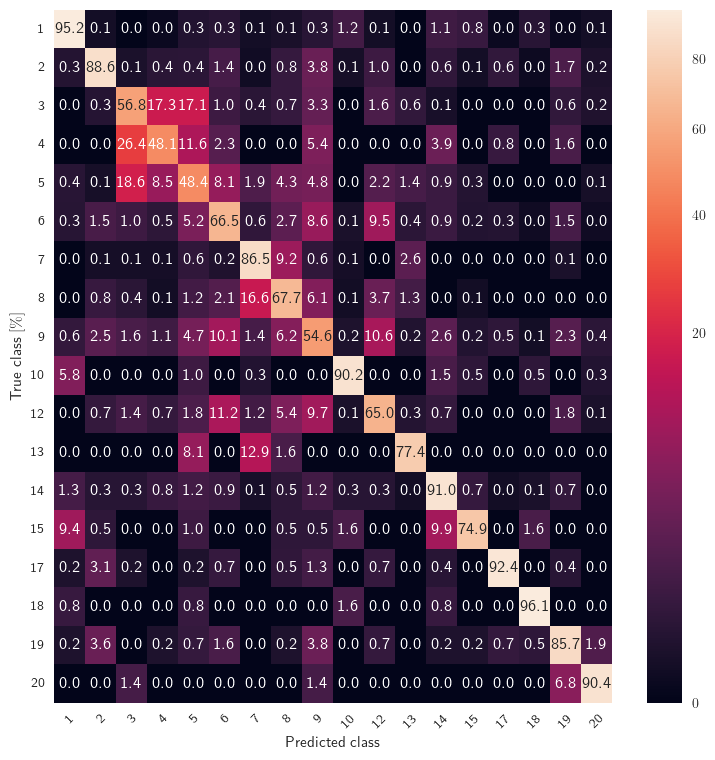

In [13]:
ext_pY = nn_train([
  Dense(100, activation='relu'),
  Dense(150,activation='relu'),
], eX_train, ecY_train_cat, 50)
print(evaluate_model(cY_valid, ext_pY))
plot_confusion_matrix(cY_valid, ext_pY, show=True, filename='figures/nn/smote.pdf')

#### CNN

46 46
Epoch 1/25
22805/22805 [==============================] - 48s 2ms/step - loss: 1.0590 - accuracy: 0.6361 - f1_score: 0.6338 - val_loss: 0.9817 - val_accuracy: 0.6426 - val_f1_score: 0.5246
Epoch 2/25
22805/22805 [==============================] - 47s 2ms/step - loss: 0.7644 - accuracy: 0.7255 - f1_score: 0.7221 - val_loss: 0.8952 - val_accuracy: 0.6607 - val_f1_score: 0.5446
Epoch 3/25
22805/22805 [==============================] - 45s 2ms/step - loss: 0.6907 - accuracy: 0.7548 - f1_score: 0.7524 - val_loss: 0.8137 - val_accuracy: 0.7108 - val_f1_score: 0.5956
Epoch 4/25
22805/22805 [==============================] - 46s 2ms/step - loss: 0.6426 - accuracy: 0.7732 - f1_score: 0.7714 - val_loss: 0.7957 - val_accuracy: 0.7124 - val_f1_score: 0.5983
Epoch 5/25
22805/22805 [==============================] - 44s 2ms/step - loss: 0.6077 - accuracy: 0.7868 - f1_score: 0.7853 - val_loss: 0.7334 - val_accuracy: 0.7409 - val_f1_score: 0.6171
Epoch 6/25
22805/22805 [=========================

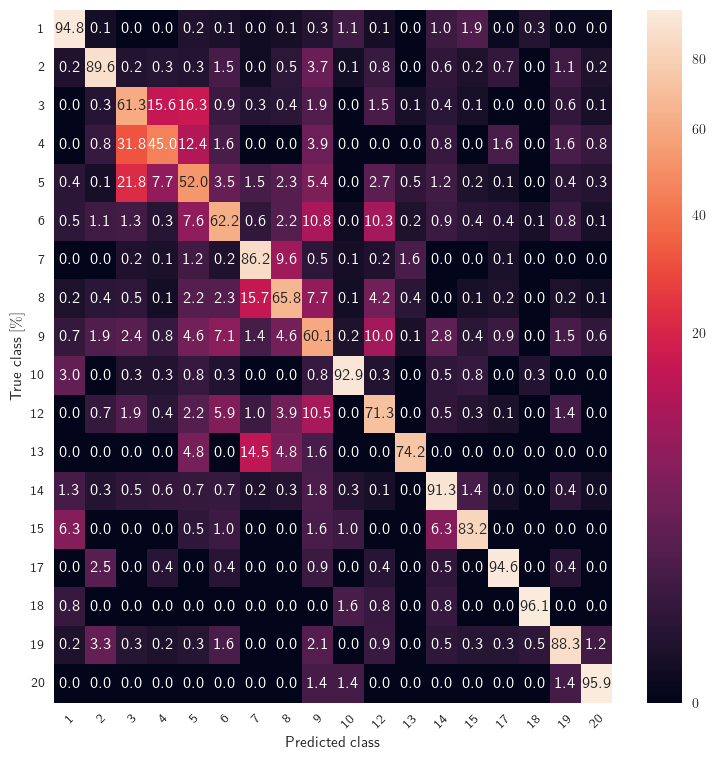

In [19]:
from tensorflow.keras.layers import Reshape,Conv1D,MaxPool1D,Flatten

conv_pY = nn_train([
  Reshape((46,1)),
  Conv1D(filters=100,kernel_size=4,input_shape=(46,1)),
  MaxPool1D(3),
  Flatten(),
  Dense(100, activation='relu'),
  Dense(125,activation='relu'),
], eX_train, ecY_train_cat, 25)
print(evaluate_model(cY_valid, conv_pY))
plot_confusion_matrix(cY_valid, conv_pY, show=True, filename='figures/nn/conv.pdf')